In [1]:
import pandas as pd
import numpy as np
import re

pd.options.display.max_columns = None

### `Question-1:`

The dataset is based on NFTs. This is quite large. So, when you will read the dataset, you have to wait. The link of the dataset: https://tinyurl.com/2pfhncqw

Your task is to make a pivote table by using the columns "verification_status", "contract_type", "rarity_score" and "last_sale_price" to find out the total values.

In [2]:
'''df1=pd.read_csv("https://tinyurl.com/2pfhncqw")
df1
#link has expired.
df1.pivot_table(columns=["verification_status", "contract_type", "rarity_score","last_sale_price"],aggfunc="sum")'''

HTTPError: HTTP Error 410: Gone

### `Question-2:`

You are given a dataset about the cars' price and miles driven of different cars throughout the different years. The link of the dataset: https://tinyurl.com/2r24n45l. Your tasks are
- make a pivot table of the brands (the required brands are given below) from the "Year" 2018 to the year 2022 in which the "Price" is shown as average values and "Miles" are in median values. In this pivote table, every row represents a particular brand and each column represents either average "Price" of a partucular year or median values of "Miles" of a particular year.
- At the end plot a kde chart for the "Price" and "Miles" by using your pivot table.

There are some challenges to solve this task:
- There is no column that is represented to the brand name of the car. You have to find out on your own.
- Some values of "Years" column are misleading. You have to reset this column too that every value should tell a valid meaning.

In [29]:
cars=pd.read_csv("https://tinyurl.com/2r24n45l")
cars

,Name,Year,Miles,Price
0,Chevrolet Trax,2018,41946,16990
1,GMC Terrain,2020,45328,23990
2,Jeep Wrangler,2012,81068,21590
3,Jeep Renegade,2019,35372,21590
4,BMW X,20173,68992,22990
...,...,...,...,...
21995,Honda Accord,2014,98085,17590
21996,Dodge Charger,2016,62616,23990
21997,Ford Taurus,2013,50345,16990
21998,Toyota Corolla Hatchback,2020,27945,23990


In [30]:
cars["Brand"]=cars["Name"].str.split().str.get(0)
cars["Year"]=cars["Year"].astype(str).str.slice(0,4).astype(int)
cars_pivot=cars[(cars["Year"]<=2022)&(cars["Year"]>=2018)].pivot_table(index="Brand",columns="Year",aggfunc={"Price":"mean","Miles":"median"})
cars_pivot

Miles                                             Price  \
Year              2018     2019     2020     2021     2022          2018   
Brand                                                                      
Acura          32516.0  50959.0  30894.0  10922.0      NaN  25323.333333   
Alfa           38908.0  20928.0      NaN      NaN      NaN  28490.000000   
Audi           49762.0  50169.5  30423.5  11205.0  20917.0  30345.555556   
BMW            39269.0  36306.0  23171.0  19978.0   3780.0  31762.093023   
Buick          50702.0  41152.0  36626.0  39884.0    372.0  21516.254545   
Cadillac       57116.0  29609.0  41046.0      NaN      NaN  28390.000000   
Chevrolet      53355.0  46375.0  50743.0  37527.0  13022.0  21262.413043   
Chrysler       64685.5  65963.0  48960.0  44225.0  24427.0  24125.062500   
Dodge          78986.0  65497.0  30995.5  32159.5   9089.0  20807.283951   
FIAT           24731.0  14573.0      NaN      NaN      NaN  22602.500000   
Ford           50572.0  47657.5  49136.0  22391.0   5298.5  20214.190283   
GMC            54181.0  54017.0  54055.0  41904.5   9854.0  26052.206897   
Genesis        42192.0  16855.0      NaN  16937.0  13938.5  28839.000000   
Honda          46242.0  39322.0  35812.0   9286.0  18500.0  24265.054054   
Hyundai        56075.0  44910.0  35882.5  31592.0   8160.0  19335.487603   
INFINITI       49555.5  61327.0  47858.0  35966.0      NaN  26140.000000   
Jaguar         35119.0  30563.0  17456.0   6943.0      NaN  33323.333333   
Jeep           53690.5  21836.5  41416.0  44188.5   8662.5  21362.570175   
Kia            37993.0  27189.0  37605.0  32006.0  14114.0  21565.608108   
Land           58929.0  41484.0  36232.0      NaN      NaN  39990.000000   
Lexus          53174.0  25356.5  21377.5  18073.0  20985.0  36056.666667   
Lincoln        43874.0  23501.5  50080.0      NaN   9494.0  26462.785714   
MAZDA          44267.0  37844.0  31832.0  41606.0   2338.0  22720.603448   
MINI           36562.0  35508.0  13268.0      NaN   5758.5  25065.000000   
Maserati           NaN  28766.0      NaN      NaN   5339.0           NaN   
Mercedes-Benz  31408.5  28937.0  22008.0  12435.0  10880.0  34910.000000   
Mitsubishi     48827.0  45100.0  39941.0  31809.0   6774.0  17137.058824   
Nissan         39266.0  37208.0  49741.0  41186.0   9975.0  20050.358209   
Polestar           NaN      NaN      NaN      NaN   6188.0           NaN   
Porsche        47451.0      NaN      NaN      NaN      NaN  45156.666667   
Ram            43299.0  41717.5  27715.5  30617.0   3664.5  34990.000000   
Subaru         51900.0  40909.0  19885.0  44615.0   9899.0  23732.857143   
Tesla          32481.0  26977.5  24383.0  15517.0   6454.0  42923.333333   
Toyota         45770.0  19796.0  37726.0  20862.0   6769.0  22926.622449   
Volkswagen     50991.0  46335.0  30069.0  23098.0  14056.5  21447.142857   
Volvo          79121.0  23902.0  41457.5  36590.0   1758.0  27306.666667   
smart          14825.0      NaN      NaN      NaN      NaN  17765.000000   

                                                                        
Year                   2019          2020          2021           2022  
Brand                                                                   
Acura          34496.777778  37590.000000  43856.666667            NaN  
Alfa           30475.714286           NaN           NaN            NaN  
Audi           28590.000000  32490.000000  71990.000000   39590.000000  
BMW            33280.909091  39811.083333  37062.727273   57030.000000  
Buick          21033.632653  24141.947368  25796.842105   26940.000000  
Cadillac       32290.000000  38777.266667           NaN            NaN  
Chevrolet      21119.717647  24684.226950  25234.727273   42358.421053  
Chrysler       26628.142857  28668.142857  26471.978723   35190.000000  
Dodge          23036.666667  26782.535714  32565.357143   36256.666667  
FIAT           23904.285714           NaN           NaN            NaN  
Ford           21698.428571

<Axes: ylabel='Density'>

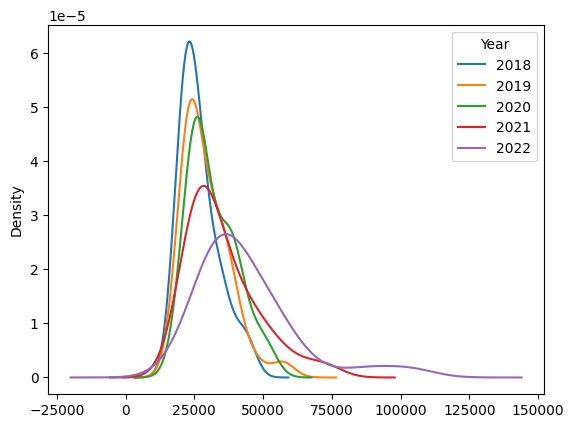

In [34]:
cars_pivot["Price"].plot.kde()


<Axes: ylabel='Density'>

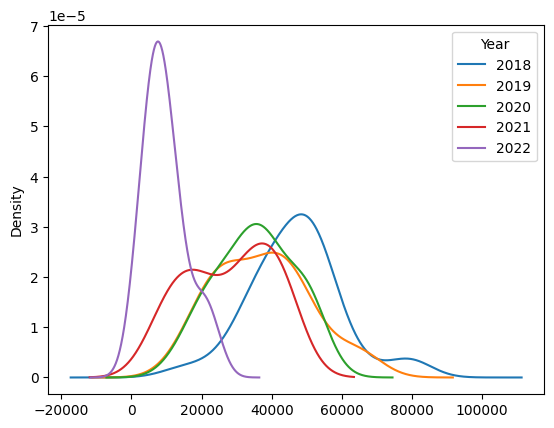

In [36]:
cars_pivot["Miles"].plot.kde()

### `Question-3:`

You are given a dataset of **Daily Power Generation in India** of regional wise of all Power Stations. Link of the dataset: https://tinyurl.com/2nq6kugt

Task
- In this dataset, there are many columns. Two of them are `Actual(MU)` and `Excess(+) / Shortfall (-)`. `Actual(MU)` represents the actual power generation. `Excess(+) / Shortfall (-)` tells is that generated power is excess or shortfall for that particular day of a power station. You have to find out what should be the actual power generation required for that day by the power stations that there would not be any excess or shorfall power. For the result, make a new column.
- Find out the month of the day and store it as a new column.
- Find out top 10 frequently appeared power stations in this dataframe.
- Next create a pivot table of which every row represents a power station and every column represents a month in a order. Like January, February, March...
- It is hard to get inside if you look through the only pivot table. So plot the pivot table.

In [90]:
#1
power["Req_MU"]=power['Actual(MU)'].sub(power['Excess(+) / Shortfall (-)'])
#2
power["Dates"]=pd.to_datetime(power["Dates"])
power["Month"]=power["Dates"].dt.month_name().astype("category")
power["Month"]=power["Month"].cat.set_categories(['January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'],ordered=True)
#3
top10=power['Power Station'].value_counts().sort_values(ascending=False).head(10)
top10

Index(['NTPC Ltd.', 'NHPC', 'NPCIL', 'GMR ENERG', 'APL', 'JPPVL', 'IBPIL',
       'TATA PCL', 'JSWEL', 'NLC'],
      dtype='object', name='Power Station')

In [93]:
#4
power_pivot=power[power["Power Station"].isin(top10.index)].pivot_table(index="Power Station",columns="Month",values=["Actual(MU)","Req_MU"])
power_pivot

/tmp/ipython-input-3903436972.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  power_pivot=power[power["Power Station"].isin(top10.index)].pivot_table(index="Power Station",columns="Month",values=["Actual(MU)","Req_MU"])


Actual(MU)                                                  \
Month             January    February       March       April         May   
Power Station                                                               
APL             69.732258   66.609929   71.086449   72.691667   63.048387   
GMR ENERG        9.180645    9.054374    9.657321   10.344444   10.459677   
IBPIL            0.000000    0.000000    0.000000    0.000000    0.000000   
JPPVL           12.922581   12.528369   13.845794   17.725000   18.842742   
JSWEL           11.964516   10.822695   12.191589   12.941667   13.790323   
NHPC             8.561290   10.007092   15.419003   21.897222   27.994624   
NLC             28.006452   30.315603   29.686916   29.904167   28.524194   
NPCIL           37.019355   36.390071   40.101246   36.080556   37.510753   
NTPC Ltd.      153.716129  158.710638  165.101869  169.720000  156.120968   
TATA PCL         8.100000    8.982270    9.787383   11.070833   10.879032   

                                                                           \
Month                June        July      August   September     October   
Power Station                                                               
APL             62.860000   63.821429   63.090323   67.088889   72.090909   
GMR ENERG        9.464444    8.779221    8.298925    8.127778    9.159596   
IBPIL            0.000000    0.000000    0.000000    0.000000    0.000000   
JPPVL           20.293333   16.629870   16.922581   18.708333   16.954545   
JSWEL           11.743333   11.211039   11.390323   12.386111   14.257576   
NHPC            32.908889   36.101732   35.335484   29.400000   18.804040   
NLC             28.666667   25.831169   24.422581   26.030556   25.818182   
NPCIL           40.664444   39.238095   36.025806   36.733333   39.638384   
NTPC Ltd.      152.176000  151.283117  148.936774  149.108889  143.681212   
TATA PCL         9.863333    8.500000    8.625806    9.544444    9.912121   

                                           Req_MU                          \
Month            November    December     January    February       March   
Power Station                                                               
APL             68.759777   70.483051   80.985710   84.028191   83.544907   
GMR ENERG       10.165736    9.246704    9.514172    9.513050    9.231184   
IBPIL            0.000000    0.000000    0.000000    0.000000    0.000000   
JPPVL           15.293296   13.774011   13.763323   14.086950   13.531752   
JSWEL           10.952514   10.454802   15.177226   15.479326   14.180397   
NHPC            12.357542    9.222222    7.910452   10.556738   16.124657   
NLC             24.840782   25.341808   29.663645   30.473759   29.498201   
NPCIL           39.864060   39.683616   38.089054   37.690307   41.238505   
NTPC Ltd.      146.667039  147.953672  144.190310  147.157461  147.758664   
TATA PCL         9.583799    8.545198    8.377129    9.187730   10.127150   

                                                                           \
Month               April         May        June        July      August   
Power Station                                                               
APL             81.390458   82.630403   78.859500   76.429026   72.830903   
GMR ENERG       10.326639   10.053468    9.414978    8.949091    9.910387   
IBPIL            0.000000    0.000000    0.000000    0.000000    0.000000   
JPPVL           16.585500   17.502903   18.661667   11.973279   15.853323   
JSWEL           12.268875   12.618306   12.566067   11.903052   12.703968   
NHPC            23.287278   29.818683   34.152622   36.458247   35.670000   
NLC             28.307125   27.160040   24.780233   26.274188   26.987710   
NPCIL           35.824583   36.146935   38.690222   37.420173   38.591548   
NTPC Ltd.      147.179983  150.345774  148.146053  143.669701  144.004645   
TATA PCL         9.986250    9.849194   10.126400    9.687078    9.079774   

       

<Axes: xlabel='Power Station'>

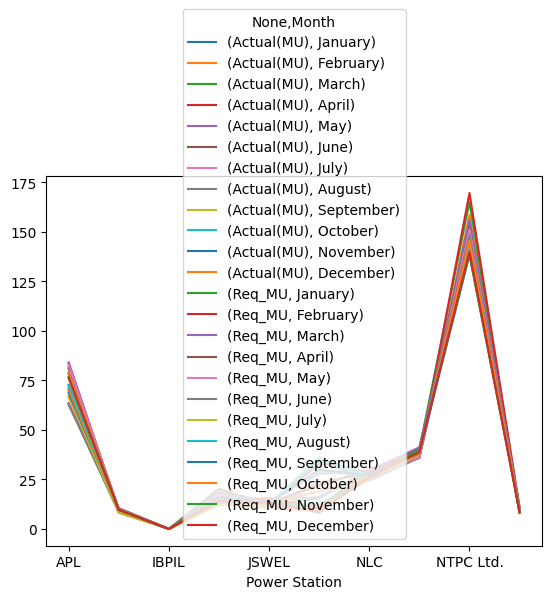

In [94]:
#5
power_pivot.plot()

In [56]:
power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345273 entries, 0 to 345272
Data columns (total 13 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Dates                             345273 non-null  datetime64[ns]
 1   Power Station                     345273 non-null  object        
 2   Monitored Cap.(MW)                345273 non-null  float64       
 3   Total Cap. Under Maintenace (MW)  345273 non-null  float64       
 4   Planned Maintanence (MW)          345273 non-null  float64       
 5   Forced Maintanence(MW)            345273 non-null  float64       
 6   Other Reasons (MW)                345273 non-null  int64         
 7   Programme or Expected(MU)         345273 non-null  int64         
 8   Actual(MU)                        345273 non-null  int64         
 9   Excess(+) / Shortfall (-)         345273 non-null  float64       
 10  Deviation                       

In [46]:
power=pd.read_csv("https://tinyurl.com/2nq6kugt")
power

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation,Req_MU,Month
0,2017-09-01,Delhi,2235.4,135.00,0.00,135.0,0,13,18,5.00,0.0,13.00,September
1,2017-09-01,Haryana,2720.0,2470.00,0.00,2470.0,0,28,7,-21.80,0.0,28.80,September
2,2017-09-01,Himachal Pradesh,3378.0,379.00,0.00,231.0,0,40,46,5.63,0.0,40.37,September
3,2017-09-01,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0,14,23,9.43,0.0,13.57,September
4,2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0,39,17,-21.69,0.0,38.69,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...
345268,2022-04-13,Tripura,137.0,32.00,0.00,0.0,32,0,1,0.29,0.0,0.71,April
345269,2022-04-13,NEEPCO.,2027.0,963.50,313.50,650.0,0,0,12,-1.59,0.0,13.59,April
345270,2022-04-13,NHPC,105.0,35.00,0.00,35.0,0,0,0,-0.72,0.0,0.72,April
345271,2022-04-13,NTPC Ltd.,750.0,250.00,0.00,250.0,0,0,11,4.45,0.0,6.55,April


###`Q-4` You are given a file `question-answer.csv`. Your task is to make a dataframe from it with two columns - `question` and `answers`.

* Questions in the file start from `Q<number>`; E.g.  `Q1` denotes question no. `1`
* Answers starts from `Ans<number>`; Eg. `Ans1` denotes answer of question no `1`
* MAke sure you look at columns name carefully

CSV File - "https://drive.google.com/file/d/10rmV3XrVtzpDTtYZF3UtCdcU0ajBJjGY/view?usp=share_link"

In [121]:
qadf=pd.read_csv("/content/question-answer task 22.csv")
qadf

,Unnamed: 0,2
0,0,Q1-What is Data Science?
1,1,"Ans1-Data Science combines statistics, maths, ..."
2,2,Q2-2. How is logistic regression done?
3,3,Ans2-Logistic regression measures the relation...
4,4,Q3-How do you build a random forest model?
5,5,Ans3-A random forest is built up of a number o...
6,6,Q4-How can you avoid overfitting your model?
7,7,Ans4-Overfitting refers to a model that is onl...
8,8,Q5-You are given a data set consisting of vari...
9,9,Ans5-The following are ways to handle missing ...


In [122]:
qadf=qadf.drop("Unnamed: 0",axis=1)

In [123]:
qadf["type"]=qadf["2"].str.split("-",n=1).str[0]
qadf["statement"]=qadf["2"].str.split("-",n=1).str[1]

In [124]:
qadf["type_code"]=qadf['type'].str.extract(r'([A-Za-z]+)')
qadf["idx"]=qadf['type'].str.extract(r'(\d+)').astype(int)

In [125]:
qadf

,2,type,statement,type_code,idx
0,Q1-What is Data Science?,Q1,What is Data Science?,Q,1
1,"Ans1-Data Science combines statistics, maths, ...",Ans1,"Data Science combines statistics, maths, speci...",Ans,1
2,Q2-2. How is logistic regression done?,Q2,2. How is logistic regression done?,Q,2
3,Ans2-Logistic regression measures the relation...,Ans2,Logistic regression measures the relationship ...,Ans,2
4,Q3-How do you build a random forest model?,Q3,How do you build a random forest model?,Q,3
5,Ans3-A random forest is built up of a number o...,Ans3,A random forest is built up of a number of dec...,Ans,3
6,Q4-How can you avoid overfitting your model?,Q4,How can you avoid overfitting your model?,Q,4
7,Ans4-Overfitting refers to a model that is onl...,Ans4,Overfitting refers to a model that is only set...,Ans,4
8,Q5-You are given a data set consisting of vari...,Q5,You are given a data set consisting of variabl...,Q,5
9,Ans5-The following are ways to handle missing ...,Ans5,The following are ways to handle missing data ...,Ans,5


In [131]:
final_df=qadf.pivot(index="idx",columns="type_code",values="statement").rename({"Ans":"Answer","Q":"Question"},axis=1)
final_df

type_code,Answer,Question
idx,,
1,"Data Science combines statistics, maths, speci...",What is Data Science?
2,Logistic regression measures the relationship ...,2. How is logistic regression done?
3,A random forest is built up of a number of dec...,How do you build a random forest model?
4,Overfitting refers to a model that is only set...,How can you avoid overfitting your model?
5,The following are ways to handle missing data ...,You are given a data set consisting of variabl...
6,Bag of Words is a representation of text that ...,What is bag of words? How we can use it for te...
7,Machine learning classification algorithms pre...,How can we use machine learning for text class...
8,A time series is a set of observations ordered...,What is a time series?
9,The principle behind causal forecasting is tha...,How is time series different from the usual re...


In [138]:
final_df

type_code,Answer,Question
idx,,
1,"Data Science combines statistics, maths, speci...",What is Data Science?
2,Logistic regression measures the relationship ...,2. How is logistic regression done?
3,A random forest is built up of a number of dec...,How do you build a random forest model?
4,Overfitting refers to a model that is only set...,How can you avoid overfitting your model?
5,The following are ways to handle missing data ...,You are given a data set consisting of variabl...
6,Bag of Words is a representation of text that ...,What is bag of words? How we can use it for te...
7,Machine learning classification algorithms pre...,How can we use machine learning for text class...
8,A time series is a set of observations ordered...,What is a time series?
9,The principle behind causal forecasting is tha...,How is time series different from the usual re...


###`Q-5`: Print Question and answer of those questions which does not contains any question mark (`?`).


In [144]:
final_df[~(final_df["Question"].str.contains(r"\?"))]

type_code,Answer,Question
idx,,


###`Q 6-10` LOG and EMPLOYEE
6. Show `activity` details month wise. Show count for each `activity`
7. Find employee who did most `activity` in January month.
8. Employee who have worked most no of times on Weekends.
9. Which activity is logged most on buisness days.
10. Week Days wise activity table.
```
log_file = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT-OMrmmNdOTM-B5f5F1EpCutMVG230UZiLvqlsg0NIKUKR3yrqiI2r1pEX-LvSEk-3WwySPYtvbBC-/pub?gid=1937029224&single=true&output=csv")
employee = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5AuFqRjSZVBKm5zyDxquX6utubq1DJKkYDI70vjeidAnyAu70KMSYpMYzeVSNVTeUIJBpfF6jU5E6/pub?gid=798824749&single=true&output=csv")

```

Note(for common field):- Employee file has `EMPLOYEE_ID` and LOG file has `emp_id`

In [95]:
log_file = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT-OMrmmNdOTM-B5f5F1EpCutMVG230UZiLvqlsg0NIKUKR3yrqiI2r1pEX-LvSEk-3WwySPYtvbBC-/pub?gid=1937029224&single=true&output=csv")
employee = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5AuFqRjSZVBKm5zyDxquX6utubq1DJKkYDI70vjeidAnyAu70KMSYpMYzeVSNVTeUIJBpfF6jU5E6/pub?gid=798824749&single=true&output=csv")

In [96]:
log_file

,Log_ID,dt,dept,emp_id,activity,eqpt
0,1000,2022-01-07,Dept6,115,Cleaning,UPS
1,1001,2022-01-08,Dept4,105,Cleaning,Generator
2,1002,2022-01-09,Dept3,112,Inspection,CPU
3,1003,2022-01-10,Dept4,120,Inspection,UPS
4,1004,2022-01-11,Dept3,138,Checking,Battery
...,...,...,...,...,...,...
360,1360,2023-01-02,Dept2,122,Repair,AC
361,1361,2023-01-03,Dept4,116,Checking,Server
362,1362,2023-01-04,Dept4,110,Checking,CPU
363,1363,2023-01-05,Dept4,102,Inspection,AC


In [97]:
employee

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
0,100,Steven,King,SKING
1,101,Neena,Kochhar,NKOCHHAR
2,102,Lex,De Haan,LDEHAAN
3,103,Alexander,Hunold,AHUNOLD
4,104,Bruce,Ernst,BERNST
5,105,David,Austin,DAUSTIN
6,106,Valli,Pataballa,VPATABAL
7,107,Diana,Lorentz,DLORENTZ
8,108,Nancy,Greenberg,NGREENBE
9,109,Daniel,Faviet,DFAVIET


### `Q-11`:

1. There are missing value in first name of employee. Fill it using email and last name field.

> E.g- `email` -> JMURMAN and `last_name` -> 'Urman' -> so make it's first name as 'JM', Sort of (Email- lastname).

> Email is constructed from initials of first name concate with lastname. Your Task is to fill first name initials in missing data.

2. You can see email field don't have any domain name. Change this to full email addreess with domain as 'campusx.com'.
E.g- Email field -> `JMURMAN`  result -> `JMURMAN@CAMPUSX.COM`

3. Show Full Name of all the employees whose name starts with 'A' and has done any of these activity ['Incpection', 'Cleaning', 'Checking]

In [ ]:
# code here